In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Outliers in age: []
Outliers in sex: []
Outliers in cp: []
Outliers in trestbps: [172, 178, 180, 180, 200, 174, 192, 178, 180]
Outliers in chol: [417, 564, 394, 407, 409]
Outliers in fbs: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in restecg: []
Outliers in thalach: [71]
Outliers in exang: []
Outliers in oldpeak: [4.2, 6.2, 5.6, 4.2, 4.4]
Outliers in slope: []
Outliers in ca: [3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3]
Outliers in thal: [0, 0]
Outliers in target: []


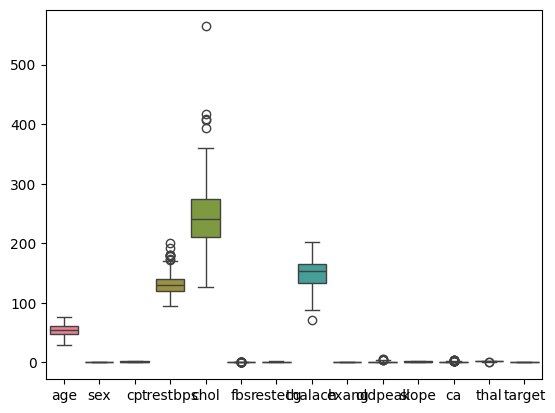

In [10]:
#Finding Outlier Using IQR Method
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()

    return outliers

# Find Outliers
outliers = detect_outliers_iqr(df)

# Display Outliers
for col, values in outliers.items():
    print(f"Outliers in {col}: {values}")
#Visualize Outlier
sns.boxplot(data=df)
plt.show()


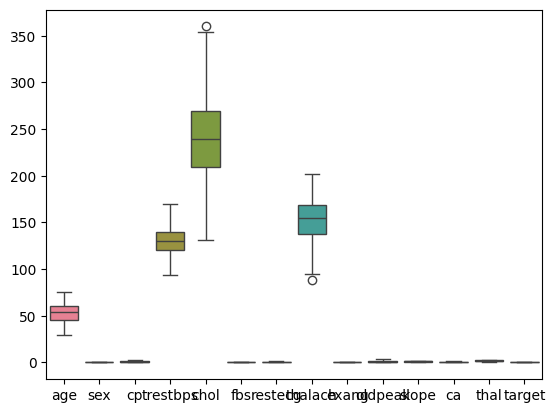

In [11]:
def remove_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

clean_data = remove_outliers(df)
sns.boxplot(data=clean_data)
plt.show()

In [12]:
#import Decision tree and random Forest model and libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [13]:
#Prepare the Data
X = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#Make Decision Tree Model and Give a data to
ds_model=DecisionTreeClassifier()
ds_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
ds_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [16]:
ds_model.score(x_train,y_train)

1.0

In [17]:
#create Random Forest Model
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
rf_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [19]:
rf_model.score(x_train,y_train)

1.0

In [20]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [23]:
model.score(x_train,y_train)

0.859504132231405

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
#Check Accurancy
y_pred_ds = ds_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
print('Classification Report'),print(classification_report(y_test,y_pred_ds))
print('Classification Report'),print(classification_report(y_test,y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.91      1.00      0.96        32

    accuracy                           0.95        61
   macro avg       0.96      0.95      0.95        61
weighted avg       0.96      0.95      0.95        61

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.89      1.00      0.94        32

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



(None, None)

In [26]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_ds))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.9508196721311475
Random Forest Accuracy: 0.9344262295081968
